In [23]:
print("-"*40)
print("ISE-291: Introduction to Data Science\nTerm 222")
print("Team 9 - Section 3\n Abdulaziz Alangari - 201962330\n Omar Alarjani - 201943670\n Omar Alawaji - 202025780\n Ali Albu ali - 202039440")
print("-"*40)

----------------------------------------
ISE-291: Introduction to Data Science
Term 222
Team 9 - Section 3
 Abdulaziz Alangari - 201962330
 Omar Alarjani - 201943670
 Omar Alawaji - 202025780
 Ali Albu ali - 202039440
----------------------------------------


In [24]:
print("-"*15, "Step 1: Discovery","-"*15)
#Read the file
import pandas as pd 
df = pd.read_csv("insuranceExcel.csv")
display(df)
df.columns
#

--------------- Step 1: Discovery ---------------


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [25]:
#2- Data Preparation.b1
#Solving null columns
print("-"*15, "Step 2: Data Preparation","-"*15)
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)



for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean() #Switch nulls of nurimcal type with the mean
    else:
        value = df[c].mode() #Switch nulls of object type with the mode
        print (value)
        value = value[0]  
        print (value)
    df[c].fillna(value,inplace=True)

display(df)
#We cleaned the noise from that data using the methods:
#Swapping nulls of nurimcal type with the mean of the same column
#Swapping nulls of object type with the mode of the same columns

--------------- Step 2: Data Preparation ---------------
Columns with NaN values are: Index([], dtype='object')


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [26]:
#2- Data Preparation.b2ed 
#Fixing incosisitancy (writing the reigon seperated by "-")
df["region"]=df["region"].apply(lambda x: x.replace("-",""))
df["region"].unique()
#We fixed inconsistancies of the factor "reigons" by erasing the  "-"  that sperated reigon name.
#Fixing incosisitancy (writing the reigon seperated by "-")

#Fixing incosisitancy (writing the reigon seperated by "-")

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [27]:
#3- Model Planning.i
print("Statisical Summaries")
display(df.describe(include='number'))
display(df.describe(include='object'))


Statisical Summaries


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


--------------- Step 3: Model Planning ---------------


Index(['sex', 'smoker', 'region'], dtype='object')

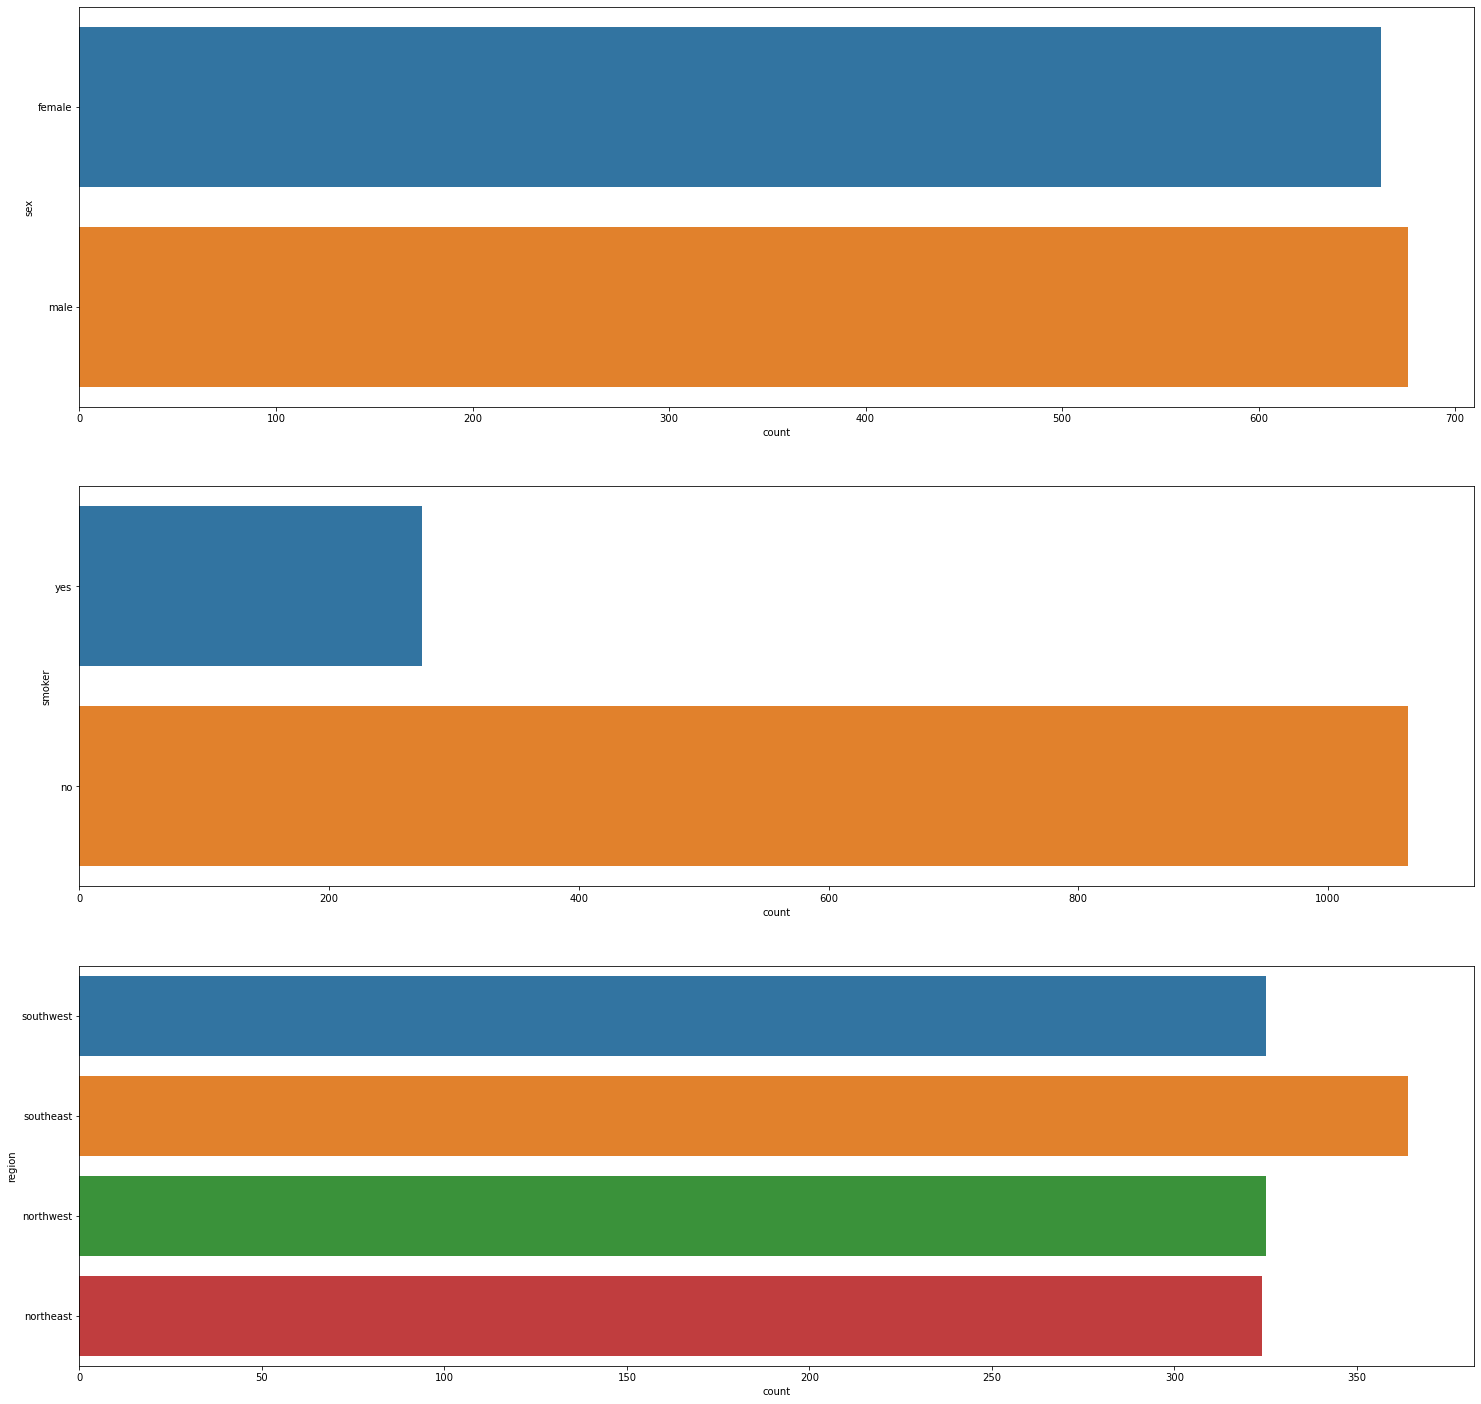

In [28]:
#3- Model Planning.ii
print("-"*15, "Step 3: Model Planning","-"*15)
%matplotlib inline
num_columns = df.select_dtypes(exclude='object').columns #To make histograms
cat_columns = df.select_dtypes(include='object').columns #To make countplot
display(cat_columns)
from matplotlib import pyplot as plt
import seaborn as sns

                     #3*1 figure
fig,axes = plt.subplots(3, 1, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()
#It is a study to ensure that the database is balanced in all factors.
#for the first tgraph which talks about genders, approximetly we have equal number of males and females and this indicates that the study will be accurate and balanced
#the second draw shows a huge difference betweens smokers and non smokers, which might cause a defficency in relation calculations
#the data shows that participants from the southeast are sligthtly higher than other reigons, which will most probably have zero or negigable impact on the relations study.

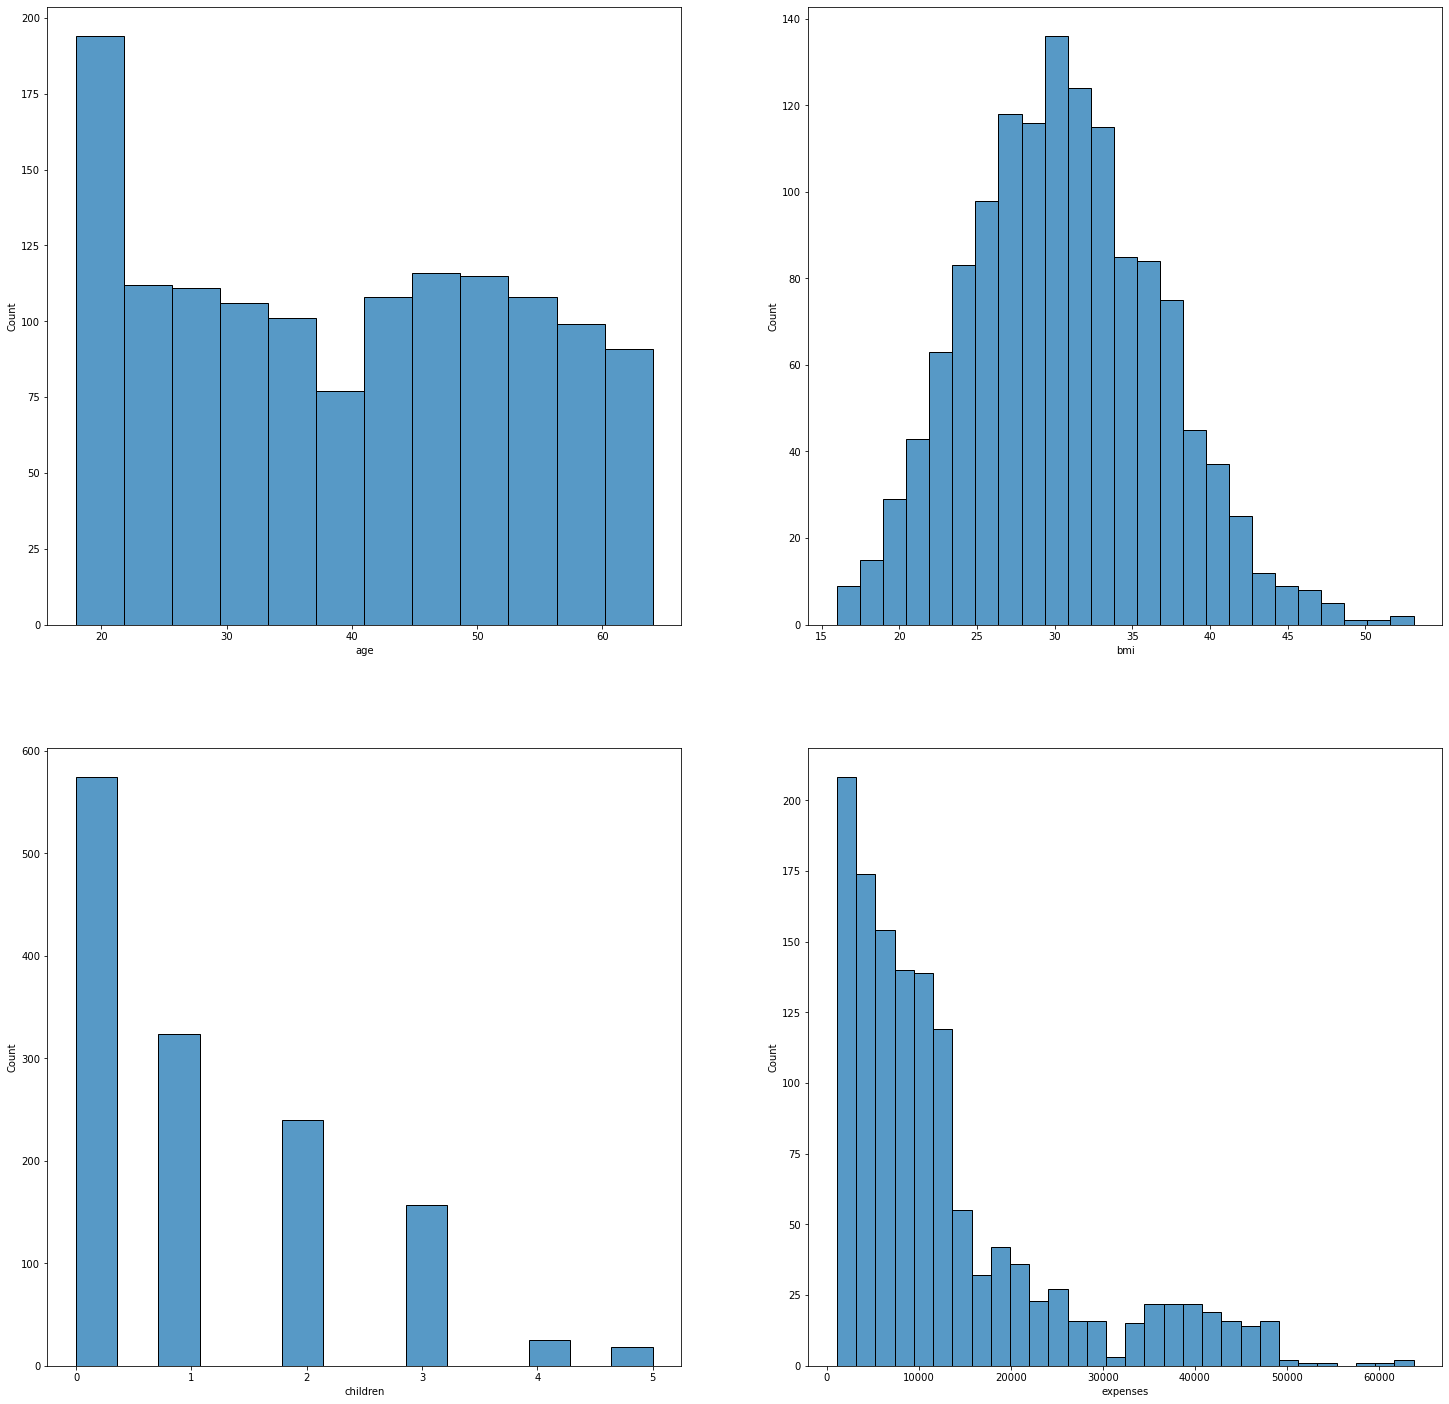

In [29]:
#3- Model Planning.ii
                    #2 * 2 figure
fig,axes = plt.subplots(2, 2, figsize=(25,25))
for ind,col in enumerate(num_columns):
    sns.histplot(x=col,data=df,ax=axes.flatten()[ind])
plt.show()
#Margin of error refers to the range of error that exists in statistical surveys or studies due to sampling limitations.
####
# we can notice from the first model that the sample of participants with the age of tweenties are significantly higher, therefore it is most likely to show more accurete predections and calculations
# from this shape we can conclude that the BMI data has normal distrubution, which mean has the same mean, mode and median
# The study's sample size is significantly smaller than its target population, which includes many more children than the sample
# The expenses show a right skewd, which might show a better accuracy in low expenses calculations.

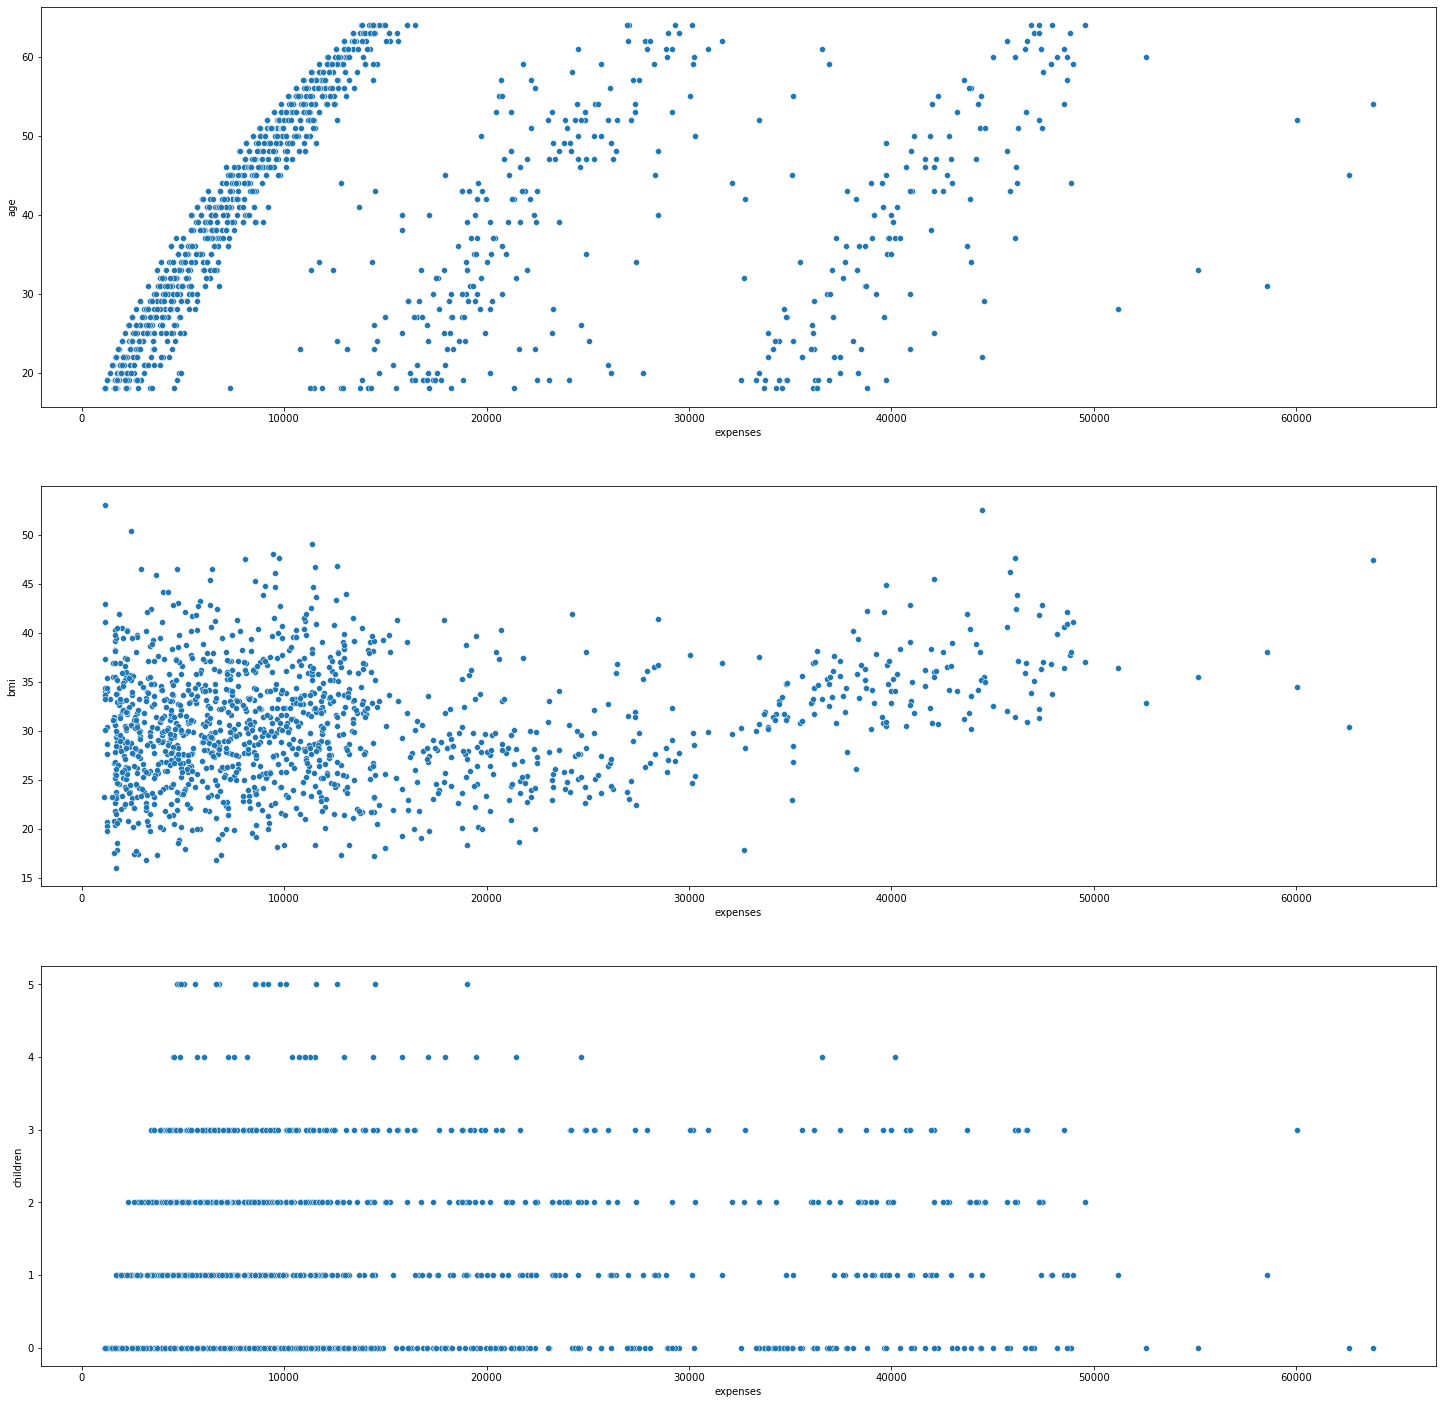

In [30]:
#Using scatter plot in numrical values with expenses in order to detect relationships

fig,axes = plt.subplots(3, 1, figsize=(25,25))
for ind,col in enumerate(num_columns[0:3]):
    sns.scatterplot(y=col,x='expenses',data=df,ax=axes.flatten()[ind])
plt.show()   
#The graph shows a positive relationship betgween age and expenses
#A clustered or dense scatterplot refers to a scatterplot where most of the points are located near to each other.
#A clustered or dense scatterplot suggests that there may be strong correlation or a pattern among the variables.
#

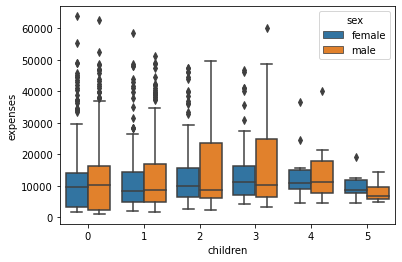

In [31]:

sns.boxplot(x='children',y='expenses',hue='sex',data=df)
plt.show()
#Sex and number of children
#this is a multivariable graph that shows a possible relationship among 3 variables : sex , number of children, and expenses
#The median of the different sample cases is close or almost the same in all the cases.

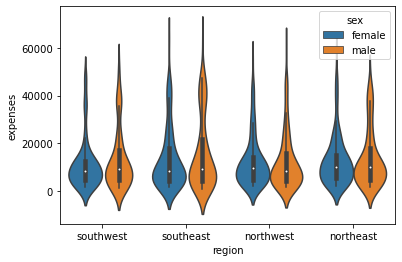

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [32]:

plt.figure()
sns.violinplot(y="expenses",x="region",hue="sex",data=df)
plt.show()

df.describe()

#Antoher possible relationship between sex and reigon with expenses

In [54]:
print("-"*15, "SUMMERY","-"*15)
print("Expenses seem to increase respectivly with age.")
print("Expenses seem to increase respectivly with number of children.")
print("Specific measures and quantities of relationships of smoking might not be accurate due to the disproportion of data.")
print("Next, we are going to use regression to support these relationships and to predict expenses for new participents.")
print("Why regression ? \n1- to notice the relationships between expenses with other factors \n2- Being able to estimate expenses based on the given elements is handful")


--------------- SUMMERY ---------------
Expenses seem to increase respectivly with age.
Expenses seem to increase respectivly with number of children.
Specific measures and quantities of relationships of smoking might not be accurate due to the disproportion of data.
Next, we are going to use regression to support these relationships and to predict expenses for new participents.
Why regression ? 
1- to notice the relationships between expenses with other factors 
2- Being able to estimate expenses based on the given elements is handful


In [34]:
#Encode the labels of the column "sex" to 0 for female and 1 for male in order to include it in our regression
print("-"*15, "Step 4: Model Building","-"*15)
import numpy as np
from sklearn.preprocessing import LabelEncoder

ndf = df.copy()
encoder1 = LabelEncoder()
encoder1.fit(ndf['sex'])
ndf['sex']=encoder1.transform(ndf['sex'])

print(f'The new values are', ndf['sex'].unique())
display(ndf)
#Clustering doesn't have a specific target variable, and it's not useful in predicting medical expenses as it's not a continuous variable. 
#Classification is used for predicting class labels, but this data set has a continuous variable as the target, not classes.
#We fit our data by using label encoding to fit in linear regression equation.

--------------- Step 4: Model Building ---------------
The new values are [0 1]


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


In [35]:
#Encode the labels of the column "smoker" to 0 for no and 1 for yes in order to include it in our regression


encoder1 = LabelEncoder()
encoder1.fit(ndf['smoker'])
ndf['smoker']=encoder1.transform(ndf['smoker'])

print(f'The new values are', ndf['smoker'].unique())
ndf.head(25)

The new values are [1 0]


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
5,31,0,25.7,0,0,southeast,3756.62
6,46,0,33.4,1,0,southeast,8240.59
7,37,0,27.7,3,0,northwest,7281.51
8,37,1,29.8,2,0,northeast,6406.41
9,60,0,25.8,0,0,northwest,28923.14


In [36]:
#Encode the labels of the column "region" in order to include it in our regression
#3 stands for southwest
#2 stands for southeast
#1 stands for northwest
#0 stands for northeast


encoder1 = LabelEncoder()
encoder1.fit(ndf['region'])
ndf['region']=encoder1.transform(ndf['region'])

print(f'The new values are', ndf['region'].unique())
display(ndf)

The new values are [3 2 1 0]


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [37]:
#import numpy as np
#ndf = df[['age','bmi','children','expenses']].copy()

corr = ndf.corr()
#display(ndf)
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

display(corr)
print(f"The correlation between the age and expenses is {corr.loc['age','expenses']}")
print(f"The correlation between the BMI and expenses is {corr.loc['bmi','expenses']}")
print(f"The correlation between the number of children and expenses is {corr.loc['children','expenses']}")
print(f"The correlation between smoking and expenses is {corr.loc['smoker','expenses']}")
print(f"The correlation between the region and expenses is {corr.loc['region','expenses']}")
#There were three factors that have shown weak correlation (sex, number of children and reigon)
#All the correlations show a positive or zero correlation except the correlation between the reigon and expensess which shows a weak negative relation
#smoking and expenses have the highest relation

C:\Users\Umar\AppData\Local\Temp\ipykernel_9012\706719135.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)


,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


The correlation between the age and expenses is 0.29900819228508263
The correlation between the BMI and expenses is 0.19857625501893206
The correlation between the number of children and expenses is 0.0679982300053281
The correlation between smoking and expenses is 0.7872514298985536
The correlation between the region and expenses is -0.006208222496482281


In [38]:
corr=corr.apply(lambda x: np.abs(x))

sorted_corr = corr.sort_values(by=['expenses'], ascending=False) 

sorted_corr = sorted_corr['expenses'].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())
print(sorted_corr)

display(ndf)

The top three correlated input variables are:  ['smoker', 'age', 'bmi']
Index(['expenses', 'smoker', 'age', 'bmi', 'children', 'sex', 'region'], dtype='object')


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [39]:
#Ridge
Xo = ndf.iloc[:,0:-1].values
y = ndf.iloc[:,-1].values

from sklearn.linear_model import Ridge
regr = Ridge(alpha=500)
regr.fit(Xo, y)
best_beta =  np.round(regr.coef_,2)
best_beta_0 = np.round(regr.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -8247.06 [245.44, 354.64, 332.87, 416.36, 7213.02, -280.52]


In [40]:
#Lasso
from sklearn.linear_model import Lasso
regl = Lasso(alpha=0.5)
regl.fit(Xo, y)
best_beta =  np.round(regl.coef_,2)
best_beta_0 = np.round(regl.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -11817.74 [257.27, -128.92, 332.61, 479.21, 23816.05, -353.05]


In [41]:
#Testing to take the most suitable regression
from sklearn.model_selection import train_test_split
X = ndf.iloc[:,:-1].values
y = ndf.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

In [43]:
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

#print('The best penalty coefficient is:', reg1.alpha_)
print('The best coefficient estimates are:', reg1.coef_)

#best_beta =  np.round(reg3.coef_,2)
#best_beta_0 = np.round(reg3.intercept_,2)
#print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())
print("\nAccording to the upper calculations, we choose the OLS model regression since it gives the least mean square error.\n")
print("Age, BMI and smoking especially are obviously the most noticable elements to determine expenses, while other elements have shown small or no relationship with expenses.")


The MSE using OLS is: 0.23078278445396555
The MSE using Ridge is: 0.23104718564441706
The MSE using Lasso is: 0.23113391452133117
The best coefficient estimates are: [ 0.30514846  0.00453661  0.1706459   0.04252702  0.79261863 -0.0299901 ]

According to the upper calculations, we choose the OLS model regression since it gives the least mean square error.

Age, BMI and smoking especially are obviously the most noticable elements to determine expenses, while other elements have shown small or no relationship with expenses.


In [44]:
#from sklearn.linear_model import LinearRegression

#reg = LinearRegression().fit(Xo, y)

#best_beta =  np.round(reg.coef_,2)
#best_beta_0 = np.round(reg.intercept_,2)
#print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

In [50]:
#Expenses Calculator based on the 6 inputs : 


#estimates = reg1.coef_ #we take the first since it is the lowest
#print(reg1.coef_)
# Prompt user for input
#input_data = input("Enter comma-separated values: ")
#input_array = np.array(input_data.split(","), dtype=float)

# Compute prediction using estimates and input array
#prediction = np.dot(estimates, np.concatenate(([1], input_array)))

#print("Prediction: ", prediction)

In [51]:
print("-"*15, "Step 5: Operationalize","-"*15)
print("ًWe used linear regression to direct the objective of the insurances data into a calculatable, studiable expenses methods.")
print("Errors in implementation:\nError rate in prediction was high, which might be justified with these three reasons:\n1- Lack of parameters (columns), which decreased the precition of predictions.\n2- The predictions range is more likely to decrease greatly by increasing the number of participants (rows).\n3- There were unfair disturbution since non-smokers in particiapnts are nearly 3 times smoking participants, therefore correlation might be affected. ")



--------------- Step 5: Operationalize ---------------
ًWe used linear regression to direct the objective of the insurances data into a calculatable, studiable expenses methods.
Errors in implementation:
Error rate in prediction was high, which might be justified with these three reasons:
1- Lack of parameters (columns), which decreased the precition of predictions.
2- The predictions range is more likely to decrease greatly by increasing the number of participants (rows).
3- There were unfair disturbution since non-smokers in particiapnts are nearly 3 times smoking participants, therefore correlation might be affected. 


In [48]:
print("-"*15, "Step 6: Communicate results","-"*15)
print("To conclude, it has been shown that smokers are more likely to have higher expenses, in addition to age which has shown a less but high effect on expenses (elders are expected to have higher expenses), which was followed by BMI, that has shown the least effect among mentioned elements, to have a positive relationship with expenses. ")
print("In the other hand, Sex, Region and number of children have shown unconsiderable or zero effect on expenses.")
print("Data source: \nhttps://www.kaggle.com/datasets/noordeen/insurance-premium-prediction")

--------------- Step 6: Communicate results ---------------
To conclude, it has been shown that smokers are more likely to have higher expenses, in addition to age which has shown a less but high effect on expenses (elders are expected to have higher expenses), which was followed by BMI, that has shown the least effect among mentioned elements, to have a positive relationship with expenses. 
In the other hand, Sex, Region and number of children have shown unconsiderable or zero effect on expenses.
Data source: 
https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction
